# Control of Aggregate Equilibrium Size

Reference https://ac-els-cdn-com.ezproxy.neu.edu/S092777571300558X/1-s2.0-S092777571300558X-main.pdf?_tid=a68d75de-2d4b-4e84-858f-c3866c0dcf14&acdnat=1542312142_f822cc2a074bc4ea24c4df9fcae90672 for the initial part of the project.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math

In [2]:
L = np.linspace(0,5,101)
L = L/ 10**6
size_step = np.diff(L)

In [3]:
def initial(L):
    #eqn taken from reference 39, eqn 20, v0 assumed to be 1 m^-3, like in the paper
    density = np.exp(-L)
    return density

[100000.          99999.995       99999.99        99999.985
  99999.98        99999.975       99999.97        99999.96500001
  99999.96000001  99999.95500001  99999.95000001  99999.94500002
  99999.94000002  99999.93500002  99999.93000002  99999.92500003
  99999.92000003  99999.91500004  99999.91000004  99999.90500005
  99999.90000005  99999.89500006  99999.89000006  99999.88500007
  99999.88000007  99999.87500008  99999.87000008  99999.86500009
  99999.8600001   99999.85500011  99999.85000011  99999.84500012
  99999.84000013  99999.83500014  99999.83000014  99999.82500015
  99999.82000016  99999.81500017  99999.81000018  99999.80500019
  99999.8000002   99999.79500021  99999.79000022  99999.78500023
  99999.78000024  99999.77500025  99999.77000026  99999.76500028
  99999.76000029  99999.7550003   99999.75000031  99999.74500033
  99999.74000034  99999.73500035  99999.73000036  99999.72500038
  99999.72000039  99999.71500041  99999.71000042  99999.70500044
  99999.70000045  99999.695000

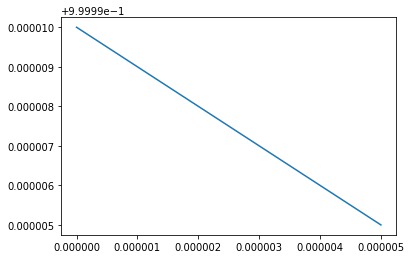

In [4]:
Ntotal = 100000
distribution = initial(L)*100000
plt.plot(L, initial(L))
print(distribution)

In [5]:
avg_size = sum(initial(L)/len(initial(L)))
avg_size
#seems reasonable? (in um)

0.9999975000041873

**Assume there is no growth or brakage and only aggregation for now. (Eq. 2)**

$$\frac{\Delta n}{\Delta t} = B - D$$

**To calculate the aggregation frequency, use the following equation. (Eq. 3)**

$$\beta_{j,k} = \frac{2k_BT}{3{\mu}W_{j,k}}(r_j+r_k)(\frac{1}{r_j}+\frac{1}{r_k}) $$

Where the stability ratio $$ W_{j,k} = (r_j+r_k)\int_{r_j+r_k}^{\infty} \frac{exp(V_T/(k_bT))}{R^2} dR $$

$$ V_T = V_A + V_E $$

$$ V_A = -\frac{A}{6}(\frac{2r_1r_2}{R^2-(r_1+r_2)^2}+\frac{2r_1r_2}{R^2(r_1-r_2)^2}+\frac{R^2-(r_1+r_2)^2}{R^2-(r_1-r_2)^2}) $$

$$ V_E = 64\pi\epsilon_r\epsilon_0(\frac{k_BT}{z_ce})^2 tanh(\frac{z_ce\psi_{01}}{4k_BT})tanh(\frac{z_ce\psi_{02}}{4k_BT})(\frac{r_1r_2}{r_1+r_2})exp(-\kappa(R-r_1-r_2)) $$

The value of the debye-huckel parameter comes from Russel, W.B., Saville, D.A. and Schowalter, W. R. Colloidal Dispersions, Cambridge University Press, 1989


$$ \kappa = \sqrt{\frac{2000e^2N I}{\epsilon_r \epsilon_0 k T}} $$

Where the ionic strength is the weighted sum of valence of the ions in solution. $$ I = \frac{1}{2}\sum_j m_j z_j^2 $$

But this should simplify because we only have one ion in solution and we can solve for the molality and we already have the valence of the counterion.

In [6]:
#some constants, from paper
kB = 1.3806 * 10**(-23) #m^2 * kg / (s^2 * K)
A = 3.08 * 10**(-20) #J
psi = 59./1000 #mV #surface potential (UNITS???)
T = 300. #K, im assuming this cuz its not given
mu = 0.00086 #N * s / m^2, from engineering toolbox cuz its not given
er = 80.4 #dielectric constant of solvent (water)
e0 = 8.85*10**-12 #dielectric constant of vacuum (F/m) eng'g toolbox
zc = 1. #valence of potassium counterion
e = 1.6021766*10**-19 # elementary charge (C)
N = 6.022*10**23 #Avogadros Number
rho = 1.*10**3 #kg/m^3 

In [91]:
#solve for the Debye-Huckel Parameter
#it depends on the molality of salt ions in solution

#ONLY VALID AT 0.29 M SALT

M = 0.29 #mol/L
m = M*1000/(rho)
I = (m*zc**2)/2
#kappa = (8*(math.pi**2)*N*rho*I/(1000*er*kB*T))**.5 old value, gave value on order of 10^20
kappa = (er * e0 * kB * T / (2 * 1000 * N *e**2 * I))**0.5
print("The value for the Debye-Huckel Parameter is {} ... I think..".format(kappa))
#debye huckel only value for low concentration electrolytes, which this isnt

The value for the Debye-Huckel Parameter is 8.108013489212379e-10 ... I think..


In [8]:
#attractive potential
def Va(R):#, r1, r2):
    Va =-A/6*(2*r1*r2/(R**2-(r1+r2)**2)+2*r1*r2/(R**2*(r1-r2)**2)+(R**2-(r1 + r2)**2)/(R**2-(r1-r2)**2))
    return Va

#repulsive potential
def Ve(R):#, r1,r2):
    Ve=64*math.pi*er*e0*(kB*T/(zc*e))**2*(np.tanh(zc*e*psi/(4. * kB * T)))**2*r1*r2/(r1+r2)*np.exp(-kappa*(R-r1-r2))
    return Ve

#total potential
def VT(R):#, r1,r2):
    VT = Ve(R) +Va(R)
    return VT

#integrand to solve for the stability ratio
def W(R):#, r1,r2):
    W = (r1+r2) * np.exp(VT(R)/(kB*T))/(R**2)
    
    return W

#aggregation frequency / growth kernel
#takes in r1 and r2 and outputs aggregation frequency
def Beta(r1, r2):
    #eqn 3 (Brownian aggregation), 4 (aggregation efficiency),
    # and 5 and 6 (interaction potential components)
    # the equations use both j,k and 1,2 should we just use one consistently?
    r1=r1 /10**6
    r2=r2 / 10**6
    if(r1==0):
        r1 = 0.00001
    if(r2==0):
        r2 = 0.00001
    
    #center-to-center distance when the particles are in contact
    R0 = r1+r2
    
    #solve for the stability ratio
    #we have to integrate over the range in possible center-to-center distances
    
    #assume all collisons result in aggregation
    Wjk = integrate.quad(W, R0, 1000.)
    
    # in eqn theres two tanh for the two colliding paticles but if theyre the same they have the same surface potential
    #solve for the aggregation frequency
    #calculate the combinations of two particles that can lead to an aggregate of size R0
 
    beta = 2 * kB * T / (3 * mu * Wjk[0]) * (r1 + r2) * (1/r1 + 1/r2)
    return beta


[1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002]


C:\Users\Rachel\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


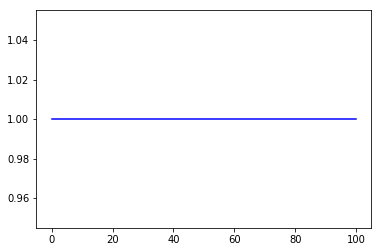

In [108]:
r1=0.200 /10**6
r2=0.205/10**6
R=np.linspace(0,100,20)
R=R/10**9
VE=[]
VA=[]
for i in range(len(R)):
    #Ve= 64*math.pi*er*e0*((kB*T/(zc*e))**2)*((np.tanh(zc*e*psi/(4. * kB * T)))**2)*r1*r2/(r1+r2)*np.exp(-kappa*(R[i]-r1-r2))
    
    Ve= np.exp(-kappa*(R[i]-r1-r2))
    Va =-A/6*(2*r1*r2/(R[i]**2-(r1+r2)**2)+2*r1*r2/(R[i]**2*(r1-r2)**2)+(R[i]**2-(r1 + r2)**2)/(R[i]**2-(r1-r2)**2))
    VE.append(Ve)
    #VA.append(Va)
R=R*10**9
plt.plot(R, VE, 'b')
#plt.plot(R, VA, 'c')
#plt.ylim(-200,200)
print(VE)

In [ ]:
Beta(0.7,1.3)

In [ ]:
#all possible combinations
beta_matrix = np.zeros((len(L),len(L)))
for indexi, i in enumerate(L):
    for indexj, j in enumerate(L):
        if(j < i):
            beta_matrix[indexi,indexj] = Beta(i,j)
        else:
            break
print(beta_matrix.shape)
beta_matrix

In [ ]:
#birth rate
def birthrate(particle_size):
    for i in enumerate(L):
        size = i[1]
        if (size==particle_size):
            indexL = i[0]
            break
            
    subL = L[1:indexL:1]
    
    birth = 0
    indexi = 0
    for i in subL:
        indexj = 0
        for j in subL:
            if (i+j==particle_size):
                birth += Beta(i,j)*distribution[indexi]*distribution[indexj]
                #print((distribution[indexi],distribution[indexj]))
            indexj += 1
        indexi += 1
        
    return birth

In [ ]:
print(birthrate(1.3))

In [ ]:
#death rate
def deathrate(particle_size):
    for i in enumerate(L):
        size = i[1]
        if (size==particle_size):
            indexj = i[0]
            break
            
    j = particle_size
    death = 0
    indexi = 0
    for i in L:
        death += Beta(i,j)*distribution[indexi]*distribution[indexj]
        indexi += 1
        
    return death

In [ ]:
print(deathrate(1.3))

In [ ]:
#solve different equation for each bin in L
def rate_of_change(n, t, L):
    s